In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
bank = pd.read_csv('bankruptcy-prevention.csv', sep=';')
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Exploratory data analysis

Now we will check the following points for data validation   
1.Null values          
2.Typing errors   
3.Mixed datatypes   
4.Duplicates values   

Then we can expolre and do data visulaization like Distribution of data, outliers detection and replacement, Use Boxplot, Density plot, Histogram to get more detail regarding concentration, distribution, skewness, outliers, range etc of data, Check the Correlation between the variables,Use scatterplot. 

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


We can see that there is typing error in the name of the columns there is a space at starting of the name.
and we can also see that there no null vlues in our dataset.

In [4]:
colm = []
for col in bank.columns:
    print(col)
    col=col.strip()
    colm.append(col)
 
bank.columns = colm

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class


In [5]:
# lets rename our class columns 
bank.rename(columns= {'class': 'target_variable'},inplace=True)

In [6]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [7]:
# checking duplicates values
df_bank = bank[bank.duplicated(keep=False)].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank.shape

(221, 7)

keep= 'False' means that this consider all of the same vlaues as duplicates.

In [8]:
df_bank_remove = bank[bank.duplicated()].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank_remove.shape

(147, 7)

Keep='first', This considers first value as unique and rest of the same values as duplicate.

so we can see from above two codes there is a duplicated rows in our dataset.

In [9]:
bank_cleaned = bank.drop_duplicates().reset_index()
bank_cleaned.head()

,index,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [10]:
bank_cleaned.drop('index', axis = 1, inplace= True)
bank_cleaned.shape

(103, 7)

So now the data is cleaned, we can apply the visualization method.

In [11]:
bank_final = bank.copy()

In [12]:
bank_final.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Visualization

In [13]:
# encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder =LabelEncoder()
bank_final['target_variable']= label_encoder.fit_transform(bank_final['target_variable'])

In [15]:
bank_final.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [16]:
bank_final.sample(20)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
216,1.0,1.0,0.5,0.5,0.5,1.0,1
46,0.5,1.0,0.0,0.0,0.0,1.0,0
151,1.0,1.0,1.0,0.5,1.0,0.0,1
87,0.5,0.0,0.0,0.0,0.0,1.0,0
7,1.0,1.0,0.0,0.0,0.0,0.5,0
232,1.0,1.0,1.0,1.0,0.5,1.0,1
78,0.5,1.0,0.0,0.0,0.0,1.0,0
233,1.0,1.0,1.0,0.5,1.0,1.0,1
188,0.5,0.0,0.5,1.0,0.5,0.0,1
141,1.0,0.0,0.5,0.5,1.0,1.0,1


In [17]:
# Correlation metrix using pandas
corr = bank_final.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
industrial_risk,1.00,0.26,-0.16,-0.01,-0.26,0.14,-0.23
management_risk,0.26,1.00,-0.25,-0.30,-0.31,0.21,-0.37
financial_flexibility,-0.16,-0.25,1.00,0.52,0.69,-0.12,0.75
credibility,-0.01,-0.30,0.52,1.00,0.68,-0.29,0.76
competitiveness,-0.26,-0.31,0.69,0.68,1.00,-0.21,0.90
operating_risk,0.14,0.21,-0.12,-0.29,-0.21,1.00,-0.28
target_variable,-0.23,-0.37,0.75,0.76,0.90,-0.28,1.00


From above correlation matrix we can say that:

1.industtrial_risk,management_risk, operating_risk are negatively correlated with target variable.    
2.financial_flexibility,credibility,competitiveness, are positively correlated with target variable.   
3.competitiveness is highly correlated with target varable.   

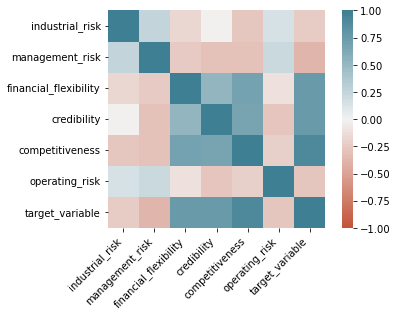

In [18]:
# Correlation metrix using seaborn
corr= bank_final.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
def countplots(data):
    plt.subplots(3,2, figsize = (15,25))
    i = 1
    for feature in data.columns:
        plt.subplot(4,2,i)
        sns.countplot(data = data, x = feature, hue='target_variable',)
        i+=1 

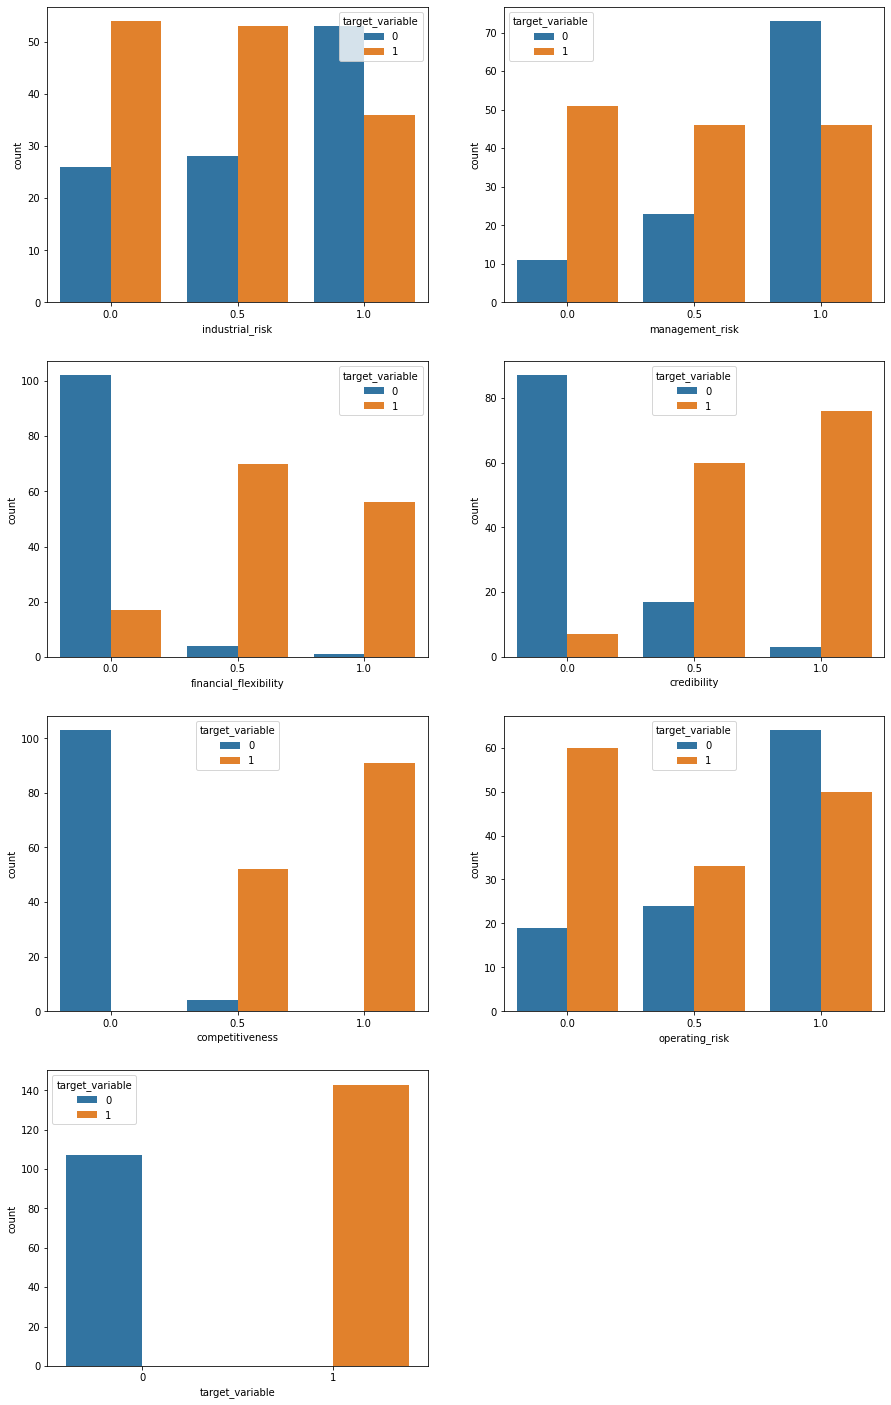

In [20]:
countplots(bank_final)

<AxesSubplot:>

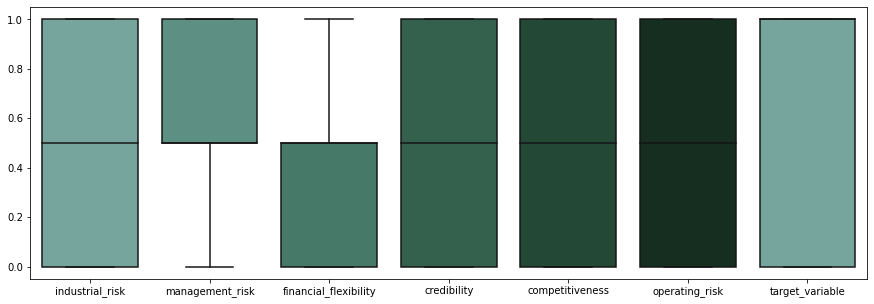

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data = bank_final, palette=sns.color_palette("ch:2,r=.2,l=.6"))


<Figure size 1440x3600 with 0 Axes>

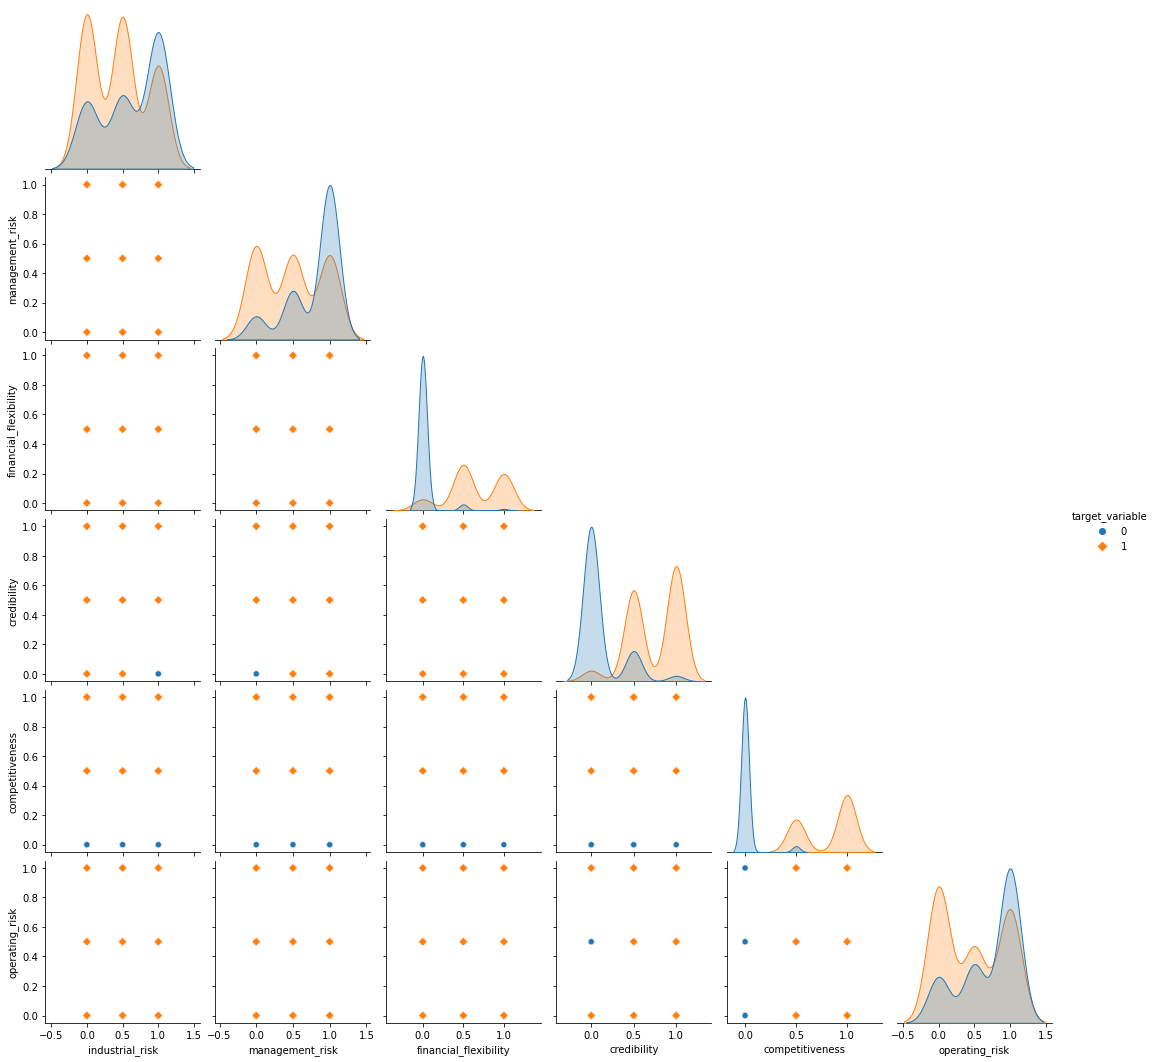

In [22]:
plt.figure(figsize=(20,50))
sns.pairplot(data = bank_final, hue = 'target_variable', markers=['o', 'D'], corner=True)

If we take a look at the competitiveness when it is equal to 0 in comparsion to other feature the company going to bankrupt.
'Competitivess' means that the ability of compay to compete with other company, if it is 0 hence company can't compete with other so it will go bankrupt. 

In [23]:
# lets take a look that just take the competitiveness we can easily pridict that the company will be bankrupt or not
bank_final[bank_final.competitiveness==0]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
101,1.0,1.0,0.0,0.5,0.0,1.0,0
102,1.0,1.0,0.5,0.0,0.0,1.0,0
103,0.0,1.0,0.0,0.0,0.0,1.0,0
104,0.5,1.0,0.0,0.0,0.0,1.0,0


In [24]:
 bank_final[bank_final.competitiveness==0.5]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
14,0.0,1.0,0.0,0.0,0.5,0.5,0
48,0.0,1.0,0.0,0.0,0.5,0.5,0
49,0.0,1.0,0.0,0.0,0.5,0.5,0
106,0.0,1.0,0.0,0.0,0.5,0.5,0
107,0.0,0.0,0.5,0.5,0.5,0.0,1
108,1.0,1.0,0.5,0.5,0.5,1.0,1
109,0.5,0.5,0.5,0.5,0.5,0.5,1
114,0.0,0.0,1.0,0.5,0.5,0.0,1
115,0.0,0.0,0.5,1.0,0.5,0.0,1
117,0.0,0.0,1.0,1.0,0.5,0.0,1


from above output we can see that there is a value where competiveness is 0.5 but still it is bankrupt so we need other variables also for prediction.

but we can say that competitiveness plays an important role for our prediction. 

# Balancing dataset

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. 

In [25]:
bank_final['target_variable'].value_counts()

1    143
0    107
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

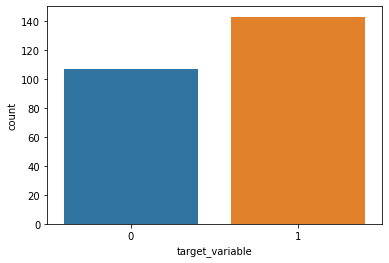

In [26]:
sns.countplot(bank_final['target_variable'])

It has been observed that our target class has an imbalance. So, we’ll try to upsample the data so that the both class matches with each other.

In [27]:
X, y = bank_final.iloc[:,:-1], bank_final.iloc[:,-1]

In [28]:
X.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_variable, dtype: int32

# Under sampling for balance the dataset

we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

 Here, the class “Non bankrupt” is called the majority class, and the much smaller in size “bankrupt” class is called the minority class.

In [30]:
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler()
X_under, y_under = under_sampling.fit_resample(X, y)

In [31]:
X_under.shape, y_under.shape, y_under.value_counts()

((214, 6),
 (214,),
 0    107
 1    107
 Name: target_variable, dtype: int64)

<AxesSubplot:xlabel='target_variable', ylabel='count'>

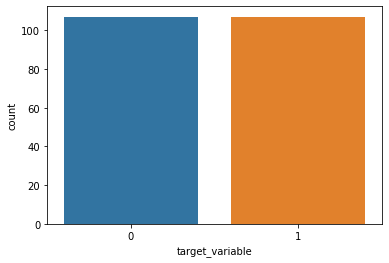

In [32]:
sns.countplot(x = y_under)

So now our dataset is balanced, both the observation are equal.

In [33]:
bank_undersampled = pd.DataFrame(data = X_under)
bank_undersampled['target_variable'] = y_under

bank_undersampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


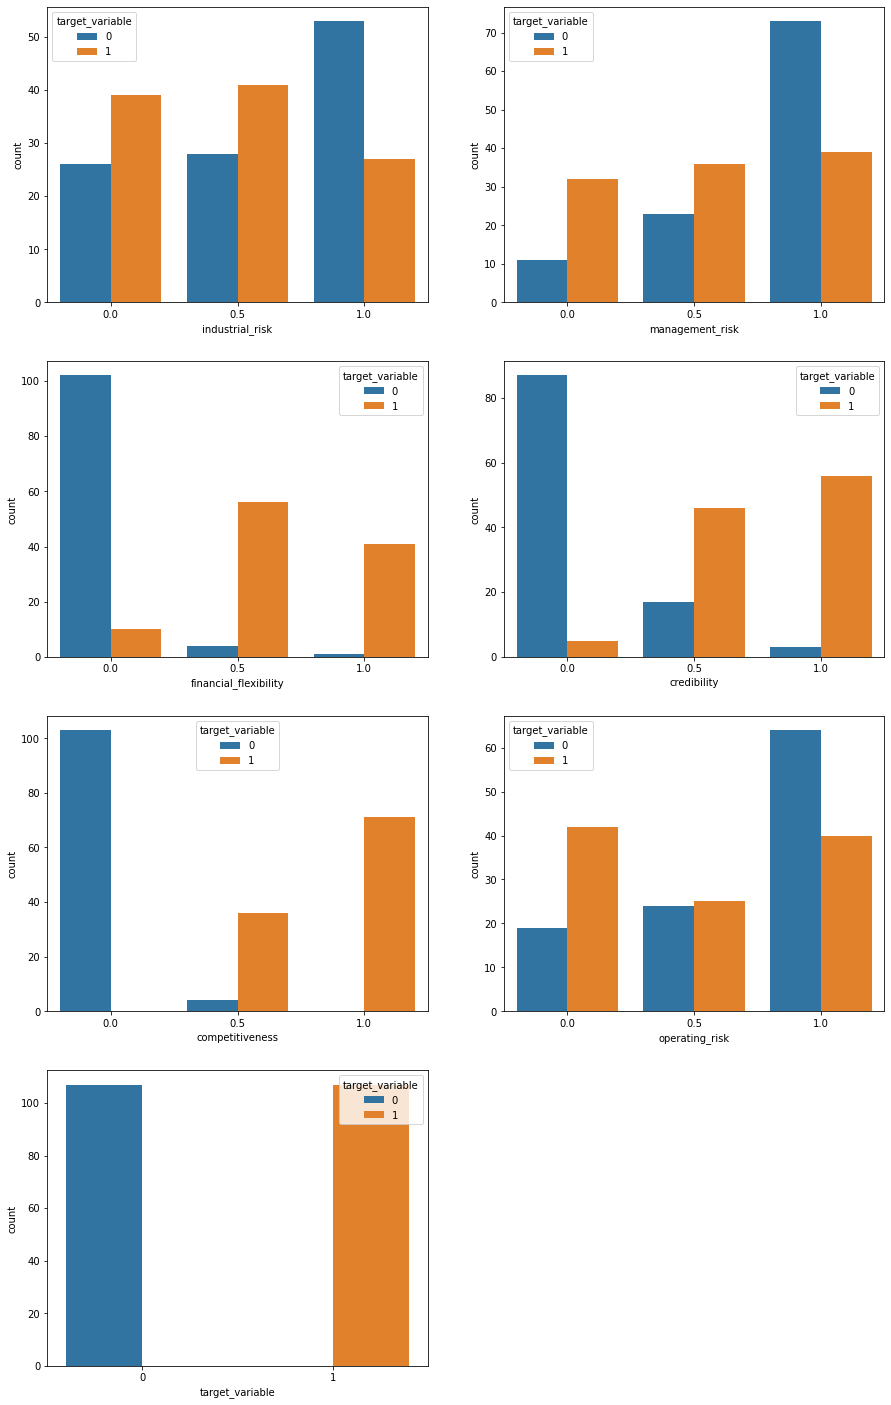

In [34]:
countplots(bank_undersampled)

# Oversampling (SMOTE method) for balancing the dataset 

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [36]:
y_over.value_counts()

0    143
1    143
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

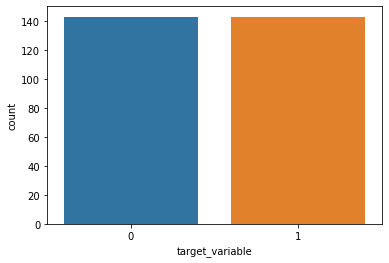

In [37]:
sns.countplot(x = y_over)

So Here also the dataset is balance and we have 78-78 obs for each categories.

In [38]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['target_variable'] = y_over

bank_oversampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [39]:
bank_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        286 non-null    float64
 1   management_risk        286 non-null    float64
 2   financial_flexibility  286 non-null    float64
 3   credibility            286 non-null    float64
 4   competitiveness        286 non-null    float64
 5   operating_risk         286 non-null    float64
 6   target_variable        286 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 14.6 KB


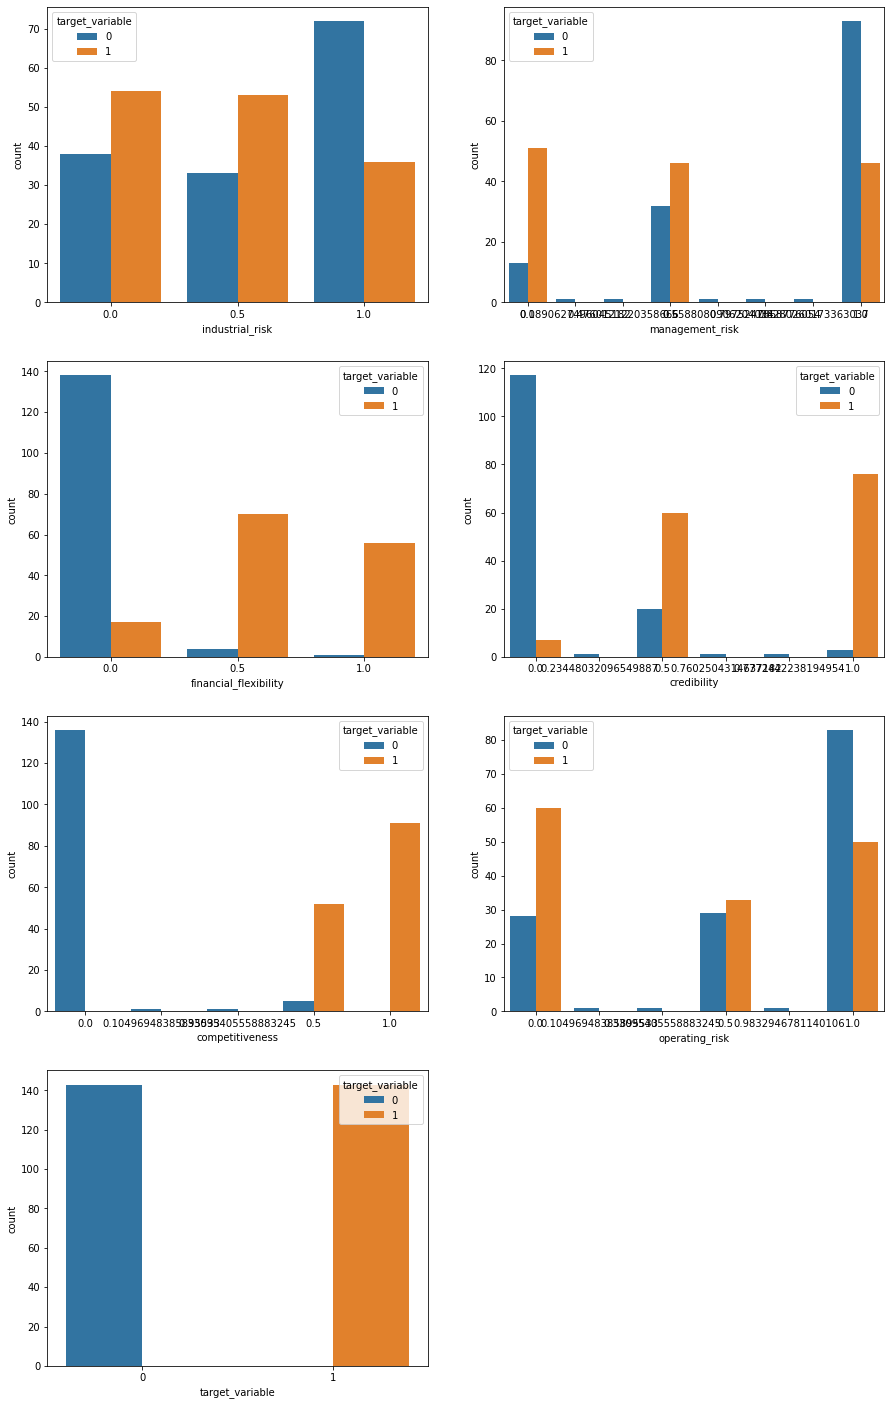

In [40]:
countplots(bank_oversampled)

In [41]:
bank_oversampled[bank_oversampled.duplicated()].head() 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
11,0.0,1.0,0.0,0.0,0.0,1.0,0
13,1.0,1.0,0.0,0.0,0.0,1.0,0
15,0.5,1.0,0.0,0.0,0.0,0.5,0
16,0.5,1.0,0.0,0.0,0.0,0.5,0
18,0.5,1.0,0.0,0.0,0.0,1.0,0


In [42]:
bank_final_1 = bank_oversampled.copy()

So we performed variour EDA methods and try to get as much as possible from the dataset.

1.There was a serious problem with duplicate values but we removed them.

2.The dataset was unbalance so we choose the oversampling.

3.The bank_final dataset will be used for model building.

4.'0' is used for Bankrupt and '1' is for non-bankrupt

5.We use LableEncoder for encoding the categorical variable

# Model selection

We have task of classification (prediction of bankruptcy).

We completed the EDA and Feature engineering on the dataset and now we can split and select the model for our job.

In [43]:
#Splitting into training and testing 
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(bank_final.iloc[:,:-1], 
                            bank_final.iloc[:,-1], random_state= 3, 
                            test_size=0.2)

In [45]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(bank_final_1.iloc[:,:-1], 
                            bank_final_1.iloc[:,-1], random_state= 4, 
                            test_size=0.2)

In [46]:
X_train.shape, X_test.shape

((200, 6), (50, 6))

In [47]:
X_train_1.shape, X_test_1.shape

((228, 6), (58, 6))

# Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lm=LogisticRegression()
lm.fit(X_train,y_train)  #fitting the model
y_pred=lm.predict(X_test)

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[25  0]
 [ 0 25]]


In [51]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


In [52]:
#Logistic model 2

classifier = LogisticRegression(penalty='l2', C = 0.018)
logistic_model_2 = classifier.fit(X_train, y_train)

In [53]:
logistic_model_2.score(X_train, y_train)

0.96

In [54]:
logistic_model_2.score(X_test, y_test)

0.96

In [55]:
# Predict for x dataset
y_pred_train = classifier.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [56]:
y_pred_train_df = pd.DataFrame({
    'actual': y_train,
    'predicted_prob': classifier.predict(X_train)
})
y_pred_train_df

,actual,predicted_prob
213,1,1
194,1,1
153,1,1
122,1,1
4,0,0
...,...,...
200,1,1
184,1,1
131,1,1
152,1,1


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusion_matrix(y_train, y_pred_train)

array([[ 74,   8],
       [  0, 118]], dtype=int64)

In [58]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        82
           1       0.94      1.00      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



Text(0, 0.5, 'True Positive Rate')

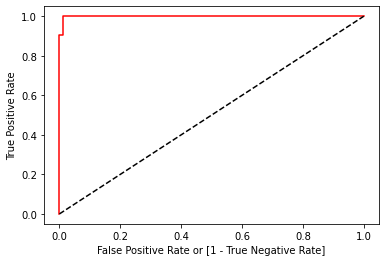

In [59]:
# ROC curves
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_train, classifier.predict_proba(X_train)[:, 1])

auc = roc_auc_score(y_train, y_pred_train)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [60]:
y_pred_test = logistic_model_2.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0])

In [61]:
confusion_matrix(y_test,y_pred_test)

array([[23,  2],
       [ 0, 25]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Text(0, 0.5, 'True Positive Rate')

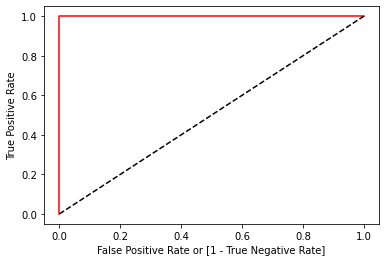

In [63]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_test, classifier.predict_proba(X_test)[:, 1])

auc = roc_auc_score(y_test, y_pred_test)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Decision Tree

In [64]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [65]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
# Predicting Data
preds = model_CART.predict(X_test)
pd.Series(preds).value_counts()

0    25
1    25
dtype: int64

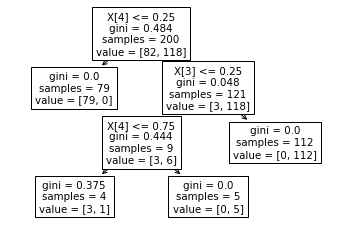

In [67]:
# Plotting Decision tree
tree.plot_tree(model_CART);

In [68]:
# Checking accuracy of model
model_CART.score(X_test, y_test)

1.0

In [69]:
model_CART.score(X_train, y_train)

0.995

# Catboost

In [70]:
from catboost import CatBoostClassifier

In [71]:
catboost_model_1 = CatBoostClassifier(iterations= 10, depth=2, 
            learning_rate = 0.01, loss_function= 'Logloss', verbose= True)

catboost_model_1.fit(X_train, y_train)

0:	learn: 0.6847886	total: 121ms	remaining: 1.09s
1:	learn: 0.6773352	total: 122ms	remaining: 487ms
2:	learn: 0.6699075	total: 122ms	remaining: 286ms
3:	learn: 0.6621452	total: 123ms	remaining: 185ms
4:	learn: 0.6549419	total: 124ms	remaining: 124ms
5:	learn: 0.6477055	total: 125ms	remaining: 83ms
6:	learn: 0.6407527	total: 125ms	remaining: 53.7ms
7:	learn: 0.6338876	total: 126ms	remaining: 31.5ms
8:	learn: 0.6265364	total: 127ms	remaining: 14.1ms
9:	learn: 0.6194772	total: 127ms	remaining: 0us


In [72]:
catboost_model_1.score(X_train, y_train)

0.985

In [73]:
catboost_model_1.score(X_test, y_test)

0.98

In [74]:
y_pred_test = catboost_model_1.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [75]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# XGBoost

In [76]:
from xgboost import XGBClassifier
import xgboost as xgb

In [77]:
xgboost_model_1 = XGBClassifier(n_estimators = 3, max_depth = 1, 
                    reg_lambda = 0.0001, use_label_encoder= False)
xgboost_model_1.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=3, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
xgboost_model_1.score(X_test, y_test)

0.98

In [79]:
xgboost_model_1.score(X_train, y_train)

0.985

In [80]:
print(classification_report(y_test, xgboost_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

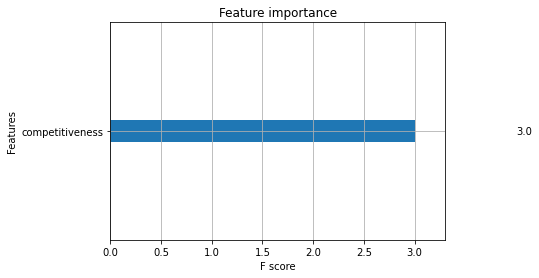

In [81]:
xgb.plot_importance(xgboost_model_1)

# LGBoost

In [82]:
import lightgbm as lgb
lgbm_model_1 = lgb.LGBMClassifier()
lgbm_model_1.fit(X_train, y_train)

LGBMClassifier()

In [83]:
lgbm_model_1 = lgb.LGBMClassifier(num_leaves= 10, max_depth= 5, learning_rate= 0.01,
                n_estimators= 10, min_split_gain= 0, reg_alpha= 0)

In [84]:
lgbm_model_1.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=5, min_split_gain=0,
               n_estimators=10, num_leaves=10, reg_alpha=0)

In [85]:
lgbm_model_1.score(X_train, y_train)

0.59

In [86]:
lgbm_model_1.score(X_test, y_test)

0.5

In [87]:
print(classification_report(y_test, lgbm_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.50      1.00      0.67        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

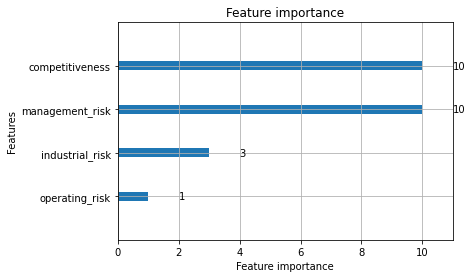

In [88]:
lgb.plot_importance(lgbm_model_1)

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [91]:
adb = AdaBoostClassifier(n_estimators=100, base_estimator=dtree,learning_rate=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [92]:
adb.score(X_train,y_train)

1.0

In [93]:
adb.score(X_test,y_test)

1.0

# SVM Model

In [94]:
from sklearn.svm import SVC

In [95]:
svm=SVC()
svm.fit(X_train_1,y_train_1)

SVC()

In [96]:
svm.score(X_train_1,y_train_1)

1.0

In [97]:
svm.score(X_test_1,y_test_1)

1.0

In [98]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [99]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [100]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [101]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
pred = knn.predict(X_test)

In [105]:
print(confusion_matrix(y_test,pred))

[[25  0]
 [ 1 24]]


In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [107]:
knn.score(X_test,y_test)

0.98

In [108]:
knn.score(X_train,y_train)

0.99

In [109]:
input_data = (0,0,0.5,0.5,0.5,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for  one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = xgboost_model_1.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The company is going to bankrupt')
else:
    print('The company is non-bankrupt')

[1]
The company is non-bankrupt


In [110]:
import pickle

In [111]:
filename = 'trained_model.sav'
pickle.dump(xgboost_model_1,open(filename,'wb'))


In [112]:
# loding the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [113]:
input_data = (0,0,0.5,0.5,0.5,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for  one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The company is going to bankrupt')
else:
    print('The company is non-bankrupt')

[1]
The company is non-bankrupt
